Project Name: GDP and Life expectancy.

In this project we will try to answer the main question: Is there a correlation between GDP and life expectancy of a country?

First we have to import and take a look at the data provided. Then we have to determine if all data is in a good shape or if it is necessary 
to do some cleaning or corrections. Next step is data visualisations like charts, plots, etc..  

 During this project we will try to answer the questions as follows:

1) How has life expectancy changed over time in all six countries?
2) How has GDP changed over time in all six countries?
3) What is the average life expectancy in these nations?
4) What does the distribution of that life expectancy look like for all given countries?

  And the main question:

5) Is there a correlation between GDP and life expectancy of a country?

Data Providers: World Bank national accounts data, and World Health Organization.

1.Python Modules.
Import the modules that will be used in this project:

In [17]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import pearsonr

2.Loading the Data.
Let us get dataset loaded and see what data we have.

In [19]:
df = pd.read_csv(r"c:\dataset\all_data.csv")
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


One column has a too long name. Let's make a new shorter one and it will be much easier to use it for labeling plots and for coding as well.

In [21]:
df = df.rename({"Life expectancy at birth (years)":"LifeExp"}, axis = "columns")

In [22]:
df.head()

,Country,Year,LifeExp,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


Looks better! We have our dataset loaded and we could start analysis.
Not so fast. Let us explore the data and see if there are any null or missing values we have to deal with. Then we will decide what to do with these findings.
 We already know how many countries are named in the dataset. What are these countries? And we can see that the time frame starts in 2000. So, the next question is how many years of observation. 

In [24]:
print(df.Country.unique())
print(df.Year.unique())

['Chile' 'China' 'Germany' 'Mexico' 'United States of America' 'Zimbabwe']
[2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013
 2014 2015]


We have a list of all six countries. And we have a dataset with the observation period from 2000 till 2015. 15 years in a row.

3. Missing values or null.

Two useful pandas functions will help us to look more carefully at the data.

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Country  96 non-null     object 
 1   Year     96 non-null     int64  
 2   LifeExp  96 non-null     float64
 3   GDP      96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


Not a big dataset. Just four columns and 96 records. Since every variable(column) has 96 non-null records we can state that there are no null or missing values.

And now let us use a second function to get another view of the data. We already know the content of the "Year" column and for that reason I will skip it. 

In [31]:
df.describe().iloc[:, 1:]

,LifeExp,GDP
count,96.000000,9.600000e+01
mean,72.789583,3.880499e+12
std,10.672882,5.197561e+12
min,44.300000,4.415703e+09
25%,74.475000,1.733018e+11
50%,76.750000,1.280220e+12
75%,78.900000,4.067510e+12
max,81.000000,1.810000e+13


Let us discuss the output.

Records: 96.
 Average Life expectancy: 72.
 Min life expectancy: 44.
 Max life expectancy: 81.
 Average GDP: 3.8 trillions.
 Min GDP: 4.42 billions.
 Max GDP: 18.1 trillions.
  

We stated earlier that there are no null or missing values in the provided data. Now it is a good idea to check out on outliers.
Let us build two plots to look at the GDP and Life Expectancy distributions.

<function matplotlib.pyplot.show(close=None, block=None)>

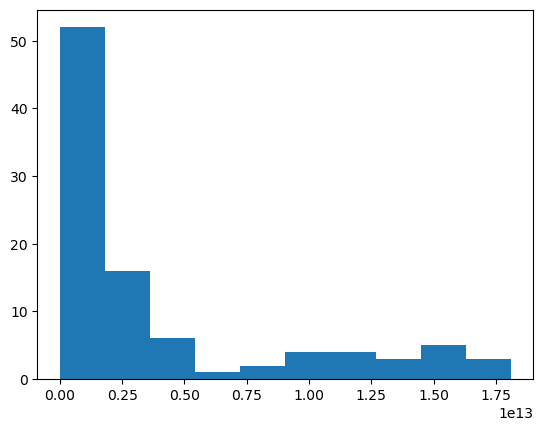

In [34]:
plt.hist(df["GDP"])
plt.show

We see that the distribution of GDP is right skewed where most of the values are on the left-hand side.
According to this plot I assume that just a few countries have a GDP rate higher than 0.5$ trillions.

<function matplotlib.pyplot.show(close=None, block=None)>

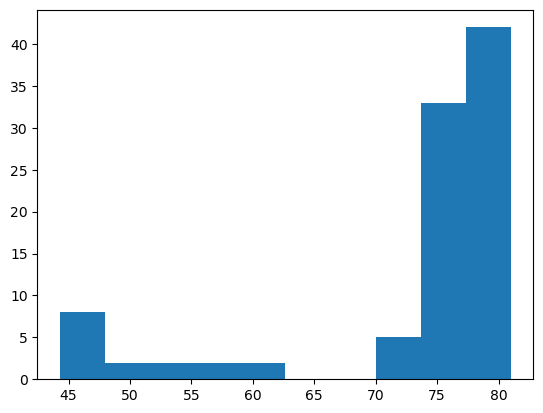

In [36]:
plt.hist(df["LifeExp"])
plt.show

The distribution of LifeExp is left skewed where most of the values are on the right-hand side. And there is a gap between 63 and 70. What is this? We already checked all data and know for sure that there are no missing or null values. Looks like an outlier.

Now we can investigate why all our both Distribution Plots are so skewed. I think we can build a Line Plots for all countries together and see what is going on.
First plot: GDP/Year.

First plot: GDP/Year.

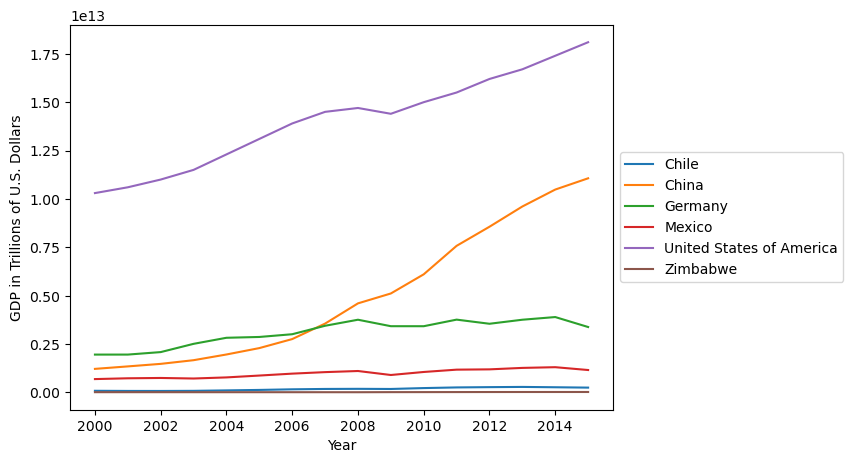

In [40]:
plt.figure(figsize=(7,5))
sns.lineplot(x=df.Year, y=df.GDP, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("GDP in Trillions of U.S. Dollars");

So, only two countries (USA and China) GDP higher than 0.5$ trillions. Four out six countries with GDP lower than 0.5. It is a good explanation why the distribution is so right skewed.

Second plot: LifeExp/Year

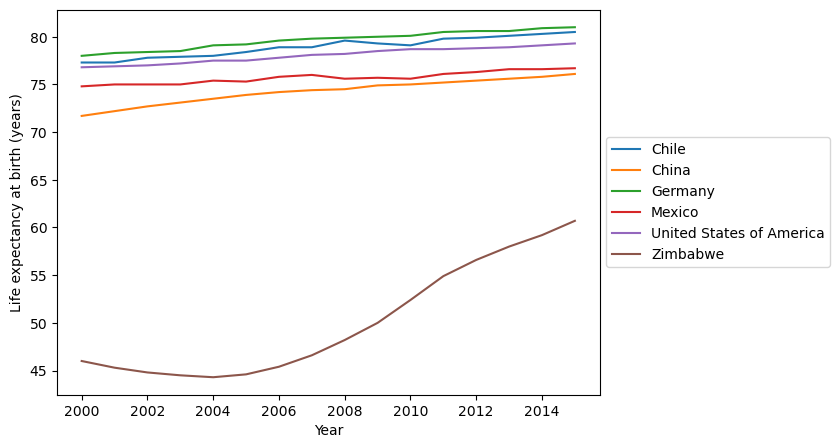

In [73]:
plt.figure(figsize=(7,5))
sns.lineplot(x=df.Year, y=df.LifeExp, hue=df.Country)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.ylabel("Life expectancy at birth (years)");


All countries have a life expectancy between 70 and 80 but one. Zimbabwe has LifeExp from 44 to 63. Therefore these numbers are not outliers. It is real data that belongs to one country. The life expectancy in Zimbabwe is significantly lower compared to other countries. That is why there is a gap
on the LifeExp distribution plot.

Let us look at the GDP/Year Line Plot. It is unclear if we have GDP increase over the time for Zimbabwe and Chile.  

Line Plots will help us again. But this time let us build personal Line plots for both above named countries. 

In [ ]:
year = df.Year.unique()
gdp_df = df[df['Country'] == 'Zimbabwe']
gdp = gdp_df['GDP']
sns.lineplot(x = year, y = gdp)

In [ ]:
year = df.Year.unique()
gdp_df = df[df['Country'] == 'Chile']
gdp = gdp_df['GDP']
sns.lineplot(x = year, y = gdp)

Yes. There GDP inrease over the time for Zimbabwe and Chile.

Now it is time to find the answer to our main question: Is there a correlation between GDP and life expectancy of a country?
We used Line Plots to figure out what happened with the GDP and Life Expectancy over the time. Through all charts we built above it is obvious that
it was not a straightforward process. In some years for some countries DGP was decreasing while LifeExp was increasing and vice versa.
Because of that, the Line Plot can be confusing and not easy to understand. I will build Scatter Plots for each country to determine correlations and p-value for calculated corr coefficient at one time. 

Let us get started. Chile: corr coefficient = 0.95. P-value < 0.05

PearsonRResult(statistic=0.9498766659254416, pvalue=1.8659139746585315e-08)

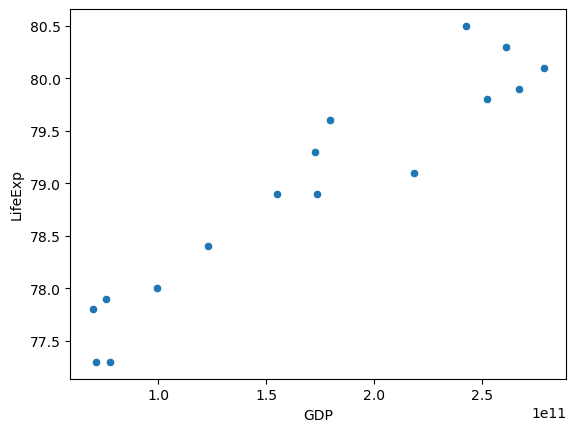

In [48]:
country_df = df[df['Country'] == 'Chile']
sns.scatterplot(data=country_df, x='GDP', y='LifeExp')
pearsonr(country_df['GDP'], country_df['LifeExp'])

 China: corr coefficient = 0.91 P-value < 0.05

PearsonRResult(statistic=0.9085255408648358, pvalue=1.125098572070064e-06)

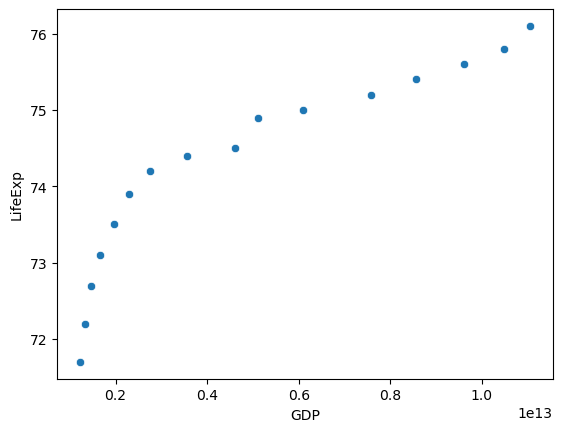

In [51]:
country_df = df[df['Country'] == 'China']
sns.scatterplot(data=country_df, x='GDP', y='LifeExp')
pearsonr(country_df['GDP'], country_df['LifeExp'])

 Germany: corr coefficient = 0.93 P-value < 0.05

PearsonRResult(statistic=0.9326988982561268, pvalue=1.4018815534045922e-07)

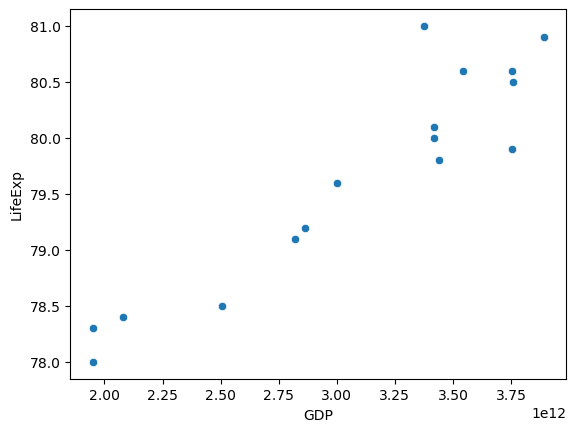

In [56]:
country_df = df[df['Country'] == 'Germany']
sns.scatterplot(data=country_df, x='GDP', y='LifeExp')
pearsonr(country_df['GDP'], country_df['LifeExp'])

Mexico: corr coefficient = 0.93 P-value < 0.05

PearsonRResult(statistic=0.9322377167847081, pvalue=1.4686960248304982e-07)

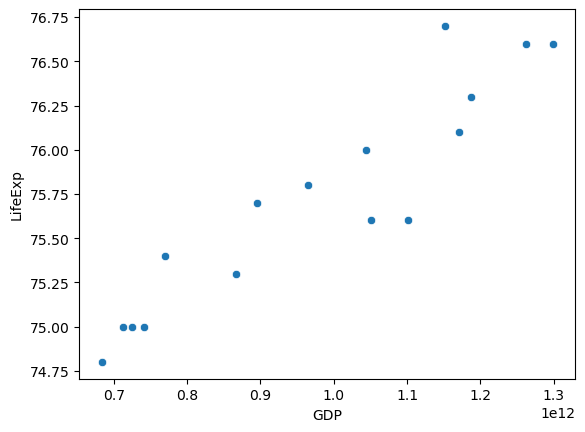

In [59]:
country_df = df[df['Country'] == 'Mexico']
sns.scatterplot(data=country_df, x='GDP', y='LifeExp')
pearsonr(country_df['GDP'], country_df['LifeExp'])

United States of America: corr coefficient = 0.98 P-value < 0.05

PearsonRResult(statistic=0.9817092382430257, pvalue=1.749970926909946e-11)

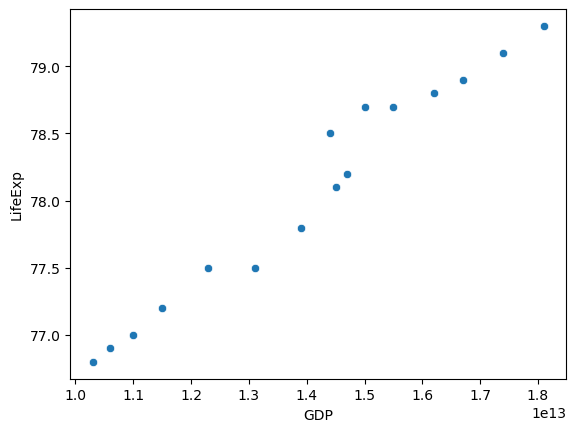

In [64]:
country_df = df[df['Country'] == 'United States of America']
sns.scatterplot(data=country_df, x='GDP', y='LifeExp')
pearsonr(country_df['GDP'], country_df['LifeExp'])

Zimbabwe:corr coefficient = 0.97. P-value < 0.05

PearsonRResult(statistic=0.9661998955858777, pvalue=1.2358516366846197e-09)

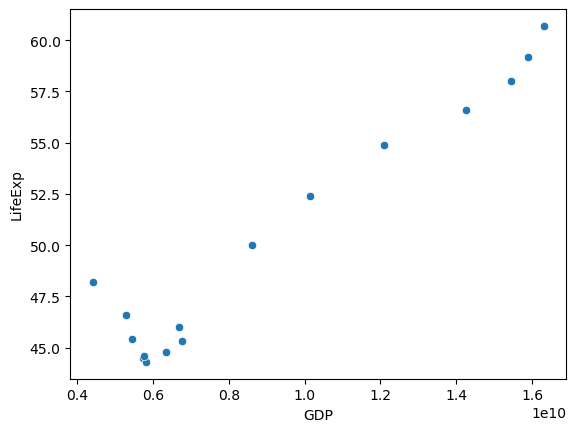

In [69]:
country_df = df[df['Country'] == 'Zimbabwe']
sns.scatterplot(data=country_df, x='GDP', y='LifeExp')
pearsonr(country_df['GDP'], country_df['LifeExp'])

Let us comment on all the above results.

All countries show strong positive correlation between GDP and Life Expectancy over the time.

The highest corr coefficients have the USA and Zimbabwe.

The lowest correlation shows China.

Conclusions

1) Life expectancy increased over time in all six countries.
   Zimbabwe has the greatest increase.
   
2) GDP increased over time in all six countries.
    China has the highest GDP increase.

3) Average life expectancy from 70s to 80s. Zimbabwe has 50.

4) Life expectancy distribution has a left skew where most of the observations are on the right side.
   
5) There is a strong positive correlation between GDP and Life Expectancy in all countries.
    China has the lowest corr coefficient.